# 🧼 Flujo de Limpieza y Transformación de Datos

Pasos ordenados para una limpieza y transformación de datos completa.

## 1. 📥 Lectura de Datos
Cargar los datos desde una fuente (CSV, Excel, SQL, etc.)

In [ ]:
import pandas as pd

df = pd.read_csv("nombre_archivo.csv", index_col = 0) # Creamos el data frame a partir de un archivo csv, json, etc.

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## 2. 🔍 Exploración General del Dataset
Ver las primeras filas y revisar estructura general.

In [ ]:
df.head()  # Muestra las primeras 5 filas del DataFrame (por defecto, pero puedes especificar un número).  
df.tail()  # Muestra las últimas 5 filas del DataFrame (por defecto, pero puedes especificar un número).  
df.sample()  # Devuelve una fila aleatoria del DataFrame (puedes especificar cuántas filas con `n`).
df.shape # Devuelve una tupla con el número de filas y columnas del DataFrame (filas, columnas).
df.info()  # Muestra información del DataFrame como el número de filas, columnas y tipos de datos.
df.describe()  # Genera estadísticas descriptivas como media, desviación estándar, etc., para las columnas numéricas.
df.columns  # Devuelve un índice con los nombres de las columnas del DataFrame.  

## 3. 🧾 Transformación de Tipo de Datos y Estandarización de Nombres
Cambiar tipos de datos y estandarizar nombres de columnas.

In [ ]:
# 1. Separamos las variables con nulos en variables categóricas y numéricas. Pero antes, deberemos haber comprobado que su tipo de dato es correcto.
df.dtypes

# 2. Convierte todos los nombres de columnas a un formato limpio y uniforme: en minúsculas, sin espacios al principio o al final del nombre y cambiando los guiones por espacios
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns] 

# También puedo usar:
df.rename(columns={'id_': 'id'}, inplace=True)

# 3. Cambiamos los tipos de variables necesarios. Por ejemplo, esta línea convierte la columna 'fecha' a un tipo de dato datetime.
df['fecha'] = pd.to_datetime(df['fecha'])  

# 4. Selecciona columnas que coincidan con el tipo de dato especificado (por ejemplo, `include=['number']`). Así podemos separarlas y operar con ellas en función de su categoría si las almacemanos en una variable.

numericas = df.select_dtypes(include=['number'])
categoricas = df.select_dtypes(include=['object'])

## 4. 🕳️ Identificación y Gestión de Nulos
Revisar y manejar valores nulos.

In [ ]:
# 1. Devuelve la cantidad de valores nulos en cada columna, es decir, los identifica. 
numericas.isnull().sum()
categoricas.isnull().sum() # para revisar el dataframe en general ponemos df en lugar de la variable 'numéricas'

nulos = df.isnull().sum()/df.shape[0]*100 # % nulos
nulos.sort_values(ascending=False) # % nulos ordenados de mayor a menor

# 2. Nos quedamos solo con las variables que tienen algún valor nulo. 
nulos = nulos[nulos > 0] 
nulos = nulos.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'}) # lo introducimos en un data frame para mejor visualización. 

# 3. Miramos la proporción de valores nulos entre cada categoría de las variables categóricas.
for col in columnas_comunes_objeto_nulos:
    print(f"La distribución de las categorías para la columna", col)
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

# 4. Miramos la distribución de las variables numéricas con histogramas.

    # Crea una lista de columnas para las que quieres hacer histogramas 

    lista_columnas_comunes_numero_nulos = []

    # Crear un histograma separado para cada columna
    for col in list(lista_columnas_comunes_numero_nulos):
        plt.figure(figsize=(8, 5))
        plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Teniendo en cuenta los resultados, decido la estrategia para cada variable. 

    # ¡Tip!
    # VARIABLES NUMÉRICAS:
    # - % alto: se imputan con técnicas más avanzadas.
    # - % bajo + distribución simétrica: imputación con la media. 
    # - % bajo + distribución asimétrica: imputación con la mediana
    # VARIABLES CATEGÓRICAS:
    # % alto nulos: se imputan con la moda o con técnicas más avanzadas
    # % bajo nulos + distribución de categoría dominante -> imputación con la moda
    # % bajo nulos + distribución no dominante -> nueva categoría

# ¿Cómo aplico las decisiones?

df.drop('columna', axis=1) # para eliminar columnas por su nombre
df.drop([0,1], axis=0) # para eliminar filas por su índice
df.dropna() # elimina todas las filas que tengan al menos un nulo
df.dropna(axis=1) # elimina columnas con nulos

df['columna'].fillna(30, inplace=True) # el método más simple: rellena SOLO LAS CELDAS NULAS con un valor fijo (como la media, la mediana, un número específico, etc.)
df['columna'].fillna(df['edad'].mean(), inplace=True) # rellenar con la media

# una estrategia automática a utilizar cuando quieras automatizar el relleno con valores estadísticos
imputer = SimpleImputer(strategy='mean')  # También puede ser 'median', 'most_frequent', 'constant'. Antes de ejecutarlo habrá que importar "from sklearn.impute import SimpleImputer"
df['columna'] = imputer.fit_transform(df[['edad']])

# también está el método KNN para rellenar con vecinos similares entre variables relacionadas o Iterative Imputer, basado en predicciones. 

## 5. 🧮 Identificación y Gestión de Duplicados
Eliminar registros duplicados si existen.

In [ ]:
# 1. Calcula la cantidad de filas duplicadas en el DatFrame

df.duplicated().sum()

# 2. 'Marcamos' los duplicados

duplicados = df.duplicated(subset=['columna1', 'columna2'], keep='first')

    # El parámetro subset es opcional y nos permite mirar dónde queremos que busque los duplicados. En su defecto consideraraá todas las columnas del df
    # El parámetro keep indica qué ocurrencias de duplicados se marcarán como True. Hay tres opciones: first para marcar todas excepto la primera, last para marcar todas excepto la última y False para marcar todas como True (lo que eliminaría todas sin dejar la ocurrencia única)

# 3. Eliminamos duplicados

df = df.drop_duplicates()

## 6. 📊 Estadísticas Básicas
Obtener estadísticas descriptivas y frecuencias.

In [ ]:
df.describe() # Para columnas que contienen números (int, float). Obtenemos el número de valores válidos, la media, los percentiles, etc.

df['columna_categ'].value_counts() # Para las variables categóricas. Esta función nos muestra cuántas veces aparece cada valor

## 7. 🧹 Limpieza y Transformación Final
Aplicar transformaciones finales según los hallazgos anteriores. Por ejemplo:

In [ ]:
# Normalizar texto en columnas categóricas o de tipo object. Esto evita errores como contar "Lima" y " lima " como diferentes.

df['columna'] = df['columna'].str.lower().str.strip()

# Reemplazar valores erróneos

df['genero'] = df['genero'].replace({'M': 'Masculino', 'F': 'Femenino'})

# Eliminar valores atípicos (outliers)

df = df[df['edad'] < 100]  # filtrar edades imposibles

# Transformar texto en número para modelado

df['genero'] = df['genero'].map({'Masculino': 0, 'Femenino': 1})

# Creación de nuevas variables basadas en las existentes

df['año'] = df['fecha'].dt.year
df['edad_grupo'] = pd.cut(df['edad'], bins=[0,18,60,100], labels=['niño','adulto','mayor'])


✅ **Flujo completo para garantizar calidad y consistencia de los datos antes del análisis o modelado.**

## 📈 Paso 8: Visualización con Gráficos

In [ ]:
# Primero importamos las bibliotecas

import seaborn as sns
import matplotlib.pyplot as plt

### 🧭 Guía para el Análisis según Tipo de Variable

Antes de comenzar, observamos **qué tipo de variable** tenemos (categórica o numérica) para decidir **qué pasos de análisis seguir**.

---

### 🔷 Variables Categóricas

#### 📌 Análisis Univariable
- Conteo de frecuencias con **gráficos de barras**
- Cálculo de **porcentajes** o **proporciones**

#### 📌 Análisis Bivariable
- **Gráficos de barras** comparativos
- **Tablas de contingencia** (cruce de variables)

#### 📌 Análisis Multivariable
- Análisis conjunto de más de dos variables categóricas (por ejemplo, con facetas o segmentaciones)

---

### 🔶 Variables Numéricas

#### 📌 Análisis Univariable
- **Histogramas** (distribución)
- **Boxplots** (detección de outliers)
- Estadísticas **descriptivas** (`mean`, `median`, `std`, etc.)

#### 📌 Análisis Bivariable
- **Gráficos de dispersión** (scatterplots)
- **Modelos de regresión lineal**
- **Coeficientes de correlación** (`.corr()` o `pearsonr`)

#### 📌 Análisis Multivariable
- Análisis de múltiples variables numéricas simultáneamente (por ejemplo: **matriz de correlación**, **regresión múltiple**)

---

### 🔁 Relación entre Variables Categóricas y Numéricas

- **Boxplots** por categoria
- **Barplots** con agregados (media, mediana, etc.)

---

✅ Esta estructura ayuda a elegir el tipo de gráfico y análisis más adecuado según el tipo de variable involucrada.

---

## 🚀 Y ahora, __¡vamos a por ello!__

---



### 🔷 __Visualización Variables Categóricas__

#### 📌 Análisis Univariable: conteo de frecuencias con **gráficos de barras**

<Axes: xlabel='education', ylabel='count'>

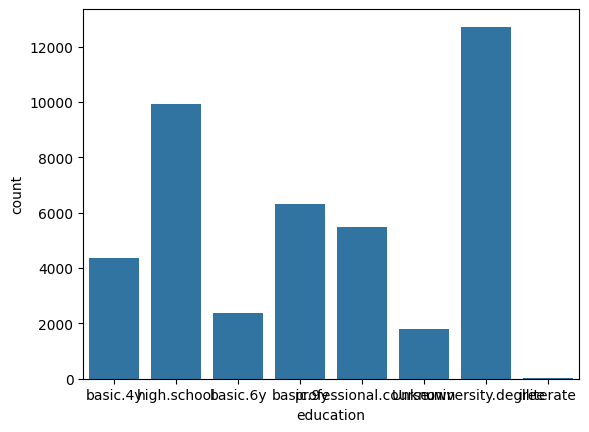

In [ ]:
# Frecuencia de niveles de educación
sns.countplot(x='education', data=df)

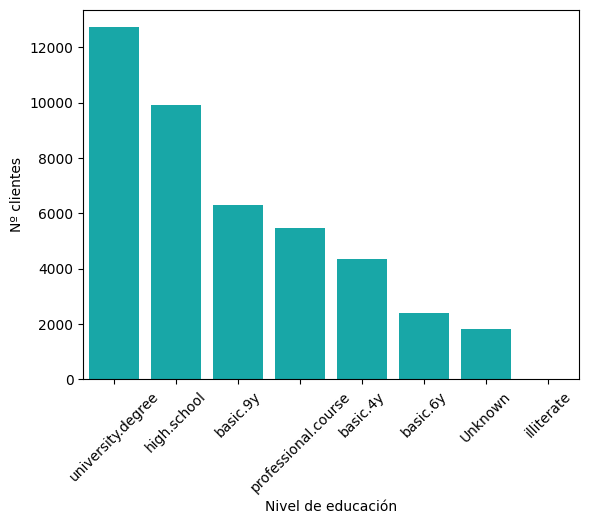

In [ ]:
# Contar los valores y ordenarlos de mayor a menor
orden_educacion = df['education'].value_counts().index

# Crear el gráfico de barras con los valores ordenados
sns.countplot(x='education', data=df, color = 'c', order=orden_educacion)

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Cambiar los nombres de los ejes
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes")

# Mostrar la gráfica
plt.show()

#### 📌 Análisis Univariable: cálculo de **porcentajes** o **proporciones**

### Análisis univariable - Porcentajes o proporciones
- Preparación de datos
- Visualización

In [ ]:
# Qeremos hacer un piechart con el % de clientes por nivel educativo. En otras palabras, hay que contar el número de ids para cada nivel educativo.

df_educacion = df.groupby("education")["id"].count().reset_index()
df_educacion

,education,id
0,Unknown,1807
1,basic.4y,4356
2,basic.6y,2386
3,basic.9y,6309
4,high.school,9925
5,illiterate,18
6,professional.course,5477
7,university.degree,12722


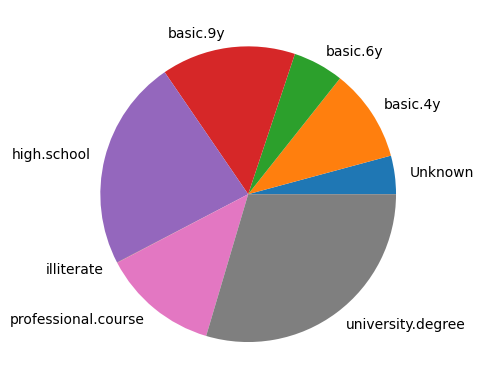

In [ ]:
# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("id", labels= "education",
        data = df_educacion)

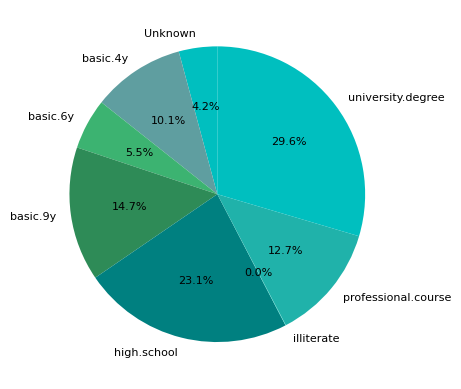

In [ ]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("id", labels= "education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

#### 📌 Análisis Bivariable: countplot con hue

C:\Users\almud\AppData\Local\Temp\ipykernel_23380\923353067.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:c'` for the same effect.

  sns.countplot(x='education', data=df, color = 'c', order=orden_educacion, hue = 'y')


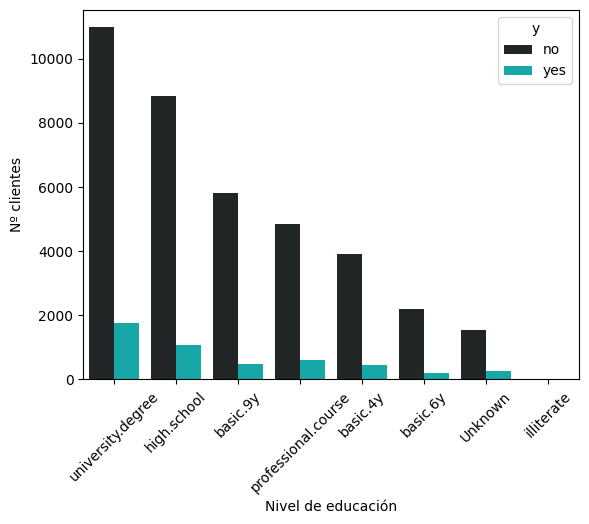

In [ ]:
# Contar los valores y ordenarlos de mayor a menor
orden_educacion = df['education'].value_counts().index

# Crear el gráfico de barras con los valores ordenados
sns.countplot(x='education', data=df, color = 'c', order=orden_educacion, hue = 'y')

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Cambiar los nombres de los ejes
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes")

# Mostrar la gráfica
plt.show()

Podemos pensar en estas gráficas como análisis equivalentes a los que hicimos con groupby.
De esta gráfica se puede deducir que, independientemente del nivel educativo, la proporción de rechazo siempre es muyo mayor que la de aceptación.

#### 📌 Análisis Bivariable: tablas contingencia

In [ ]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'
crosstab_result = pd.crosstab(df['education'], df['y'])

crosstab_result

y,no,yes
education,,
Unknown,1546,261
basic.4y,3908,448
basic.6y,2192,194
basic.9y,5816,493
high.school,8849,1076
illiterate,14,4
professional.course,4857,620
university.degree,10974,1748


### 🔶 __Visualización Variables Numéricas__

Con las siguientes visualizaciones, podremos responder a preguntas como:

- ¿Cómo se distribuyen las edades de los individuos en el conjunto de datos? Histograma de la variable "age": Esta gráfica mostraría la distribución de las edades de los individuos en el DataFrame, lo que nos permitiría obtener información sobre la dispersión y la forma de la distribución.

- ¿Existe alguna relación entre la edad y el número de días que han pasado desde el último contacto? Gráfico de dispersión entre las variables "age" y "pdays": Este gráfico nos permitiría explorar la relación entre la edad y el tiempo de contacto. Esto podría ayudarnos a identificar posibles patrones o correlaciones entre estas variables.

- ¿Existen valores atípicos en la cantidad de contactos realizados durante la campaña publicitaria? Boxplot de la variable "campaign": Este gráfico nos ayudaría a identificar la distribución de la cantidad de contactos realizados durante la campaña publicitaria, así como a identificar posibles valores atípicos.


#### 📌 Análisis Univariable: histogramas

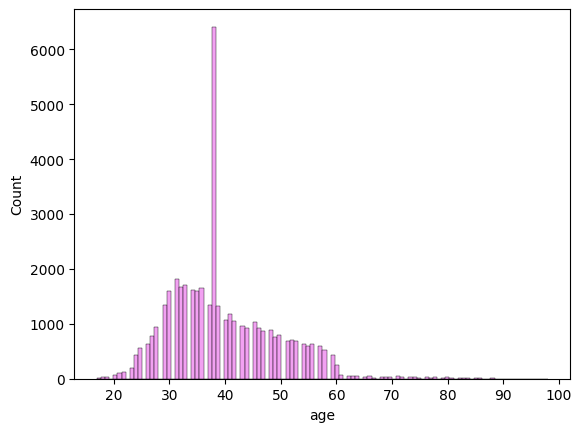

In [ ]:
# creamos nuestra primera gráfica, en este caso queremos saber como están distribuidas las edades entre nuestros clientes
# para ello usamos el método 'sns.histplot', en este caso le hemos cambiado el color por defecto usando el parámetro 'color' 
sns.histplot(x = "age", data = df, color = "violet");

**¿Cómo podemos interpretar esta gráfica?**

En el eje x tenemos los grupos de edad que hemos generado automáticamente con los bins, y en el eje y el conteo del total de gente se ha contactado (el número de personas a las que se ha llamado)

- Las personas contactadas no son menores de 10-20 años. 

- Se contactan muy pocas personas a partir de los 60 años. 

- La mayoría de los contactos se hacen en personas de ente 30 -50 años. 

Si nos vamos a las tablas que teníamos al inicio, vemos que esta misma gráfica la podemos hacer usando la librería de matplotlib. Su sintaxis básica es:
```python
plt.hist(x, bins=None, range=None, density=False, cumulative=False, color=None, edgecolor=None)
```
Los parámetros principales:

- `x`: Los datos numéricos que se utilizarán para crear el histograma.

- `data`: El DataFrame o la Serie que contiene los datos.

- `bins`: Especifica el número de contenedores (bins) en los que se dividirán los datos. También se puede proporcionar una secuencia de valores que representan los bordes de los bins.

- `range`: Especifica el rango de valores que se considerarán en el histograma. Se lo tendremos que pasar como lista, indicando el valor mínimo y máximo que queremos en el eje x. 

- `density`: Si se establece en True, el histograma mostrará densidades en lugar de frecuencias.

- `cumulative`: Si se establece en True, el histograma mostrará una distribución acumulativa en lugar de una distribución normal.

- `color`: Color de las barras del histograma. Podremos usar los mismos que en seaborn. 

- `edgecolor`: Color del borde de las barras del histograma.

Además de los argumentos mencionados, hay muchos otros argumentos opcionales que se pueden utilizar para personalizar el histograma, como el grosor de las barras, la transparencia, la orientación, entre otros.

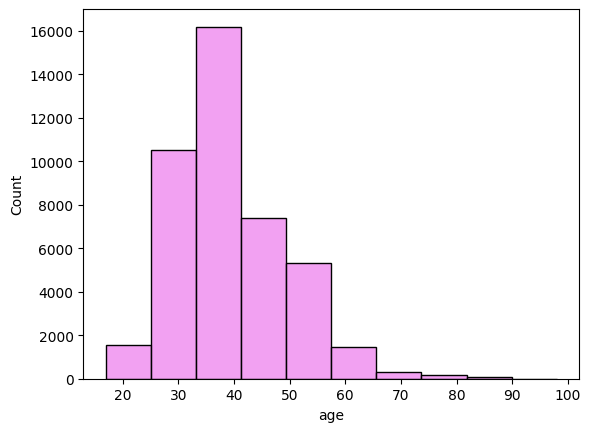

In [ ]:
sns.histplot(x = "age", data = df, bins = 10, color = "violet");

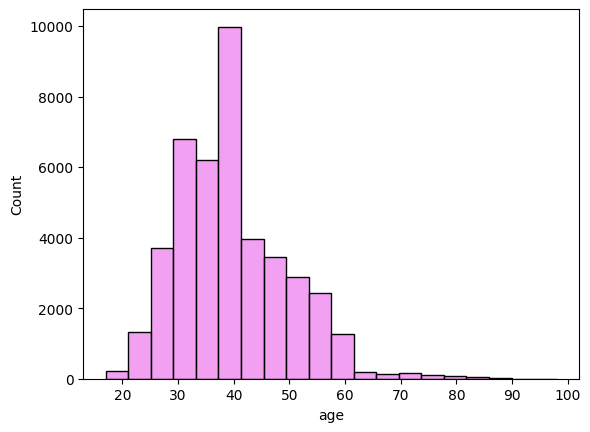

In [ ]:
sns.histplot(x = "age", data = df, bins = 20, color = "violet");

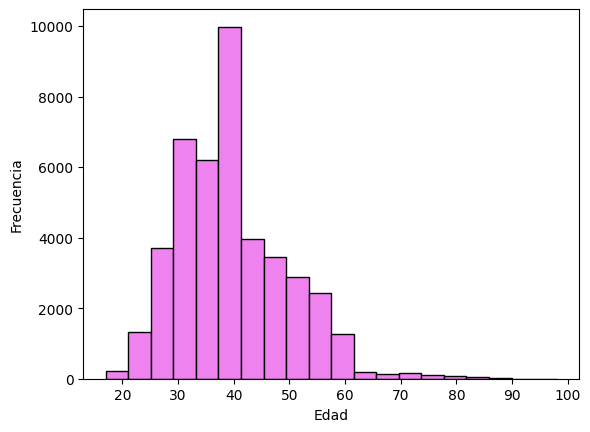

In [ ]:
plt.hist(x = "age", 
         data = df, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black")
# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
plt.xlabel("Edad")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
plt.ylabel("Frecuencia");

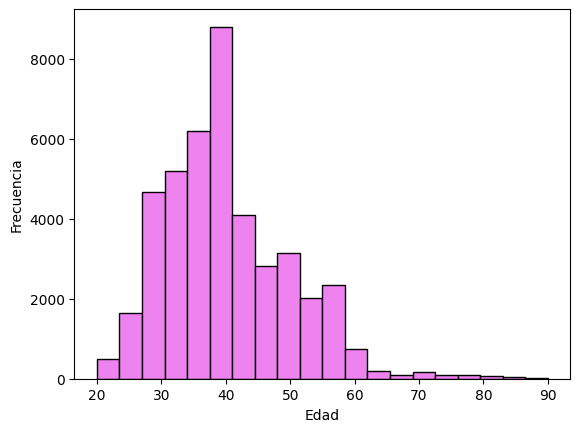

In [ ]:
plt.hist(x = "age", 
         data = df, 
         bins = 20, 
         color = "violet", 
         range = [20, 90],
         edgecolor = "black")
# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
plt.xlabel("Edad")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
plt.ylabel("Frecuencia");

#### 📌 Análisis Univariable: boxplot

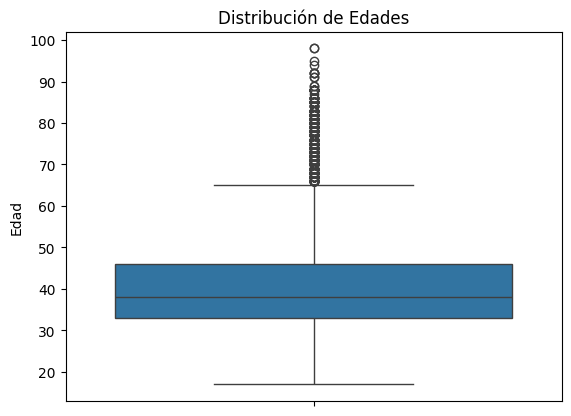

In [ ]:
# Crear un boxplot univariante para la variable 'age'
sns.boxplot(y='age', data=df)

# Personalizar el gráfico
plt.title('Distribución de Edades')
plt.ylabel('Edad')
plt.show()

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id
0,38.0,housemaid,MARRIED,basic.4y,No,No,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,No,No,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,Si,No,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,No,No,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,No,Si,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


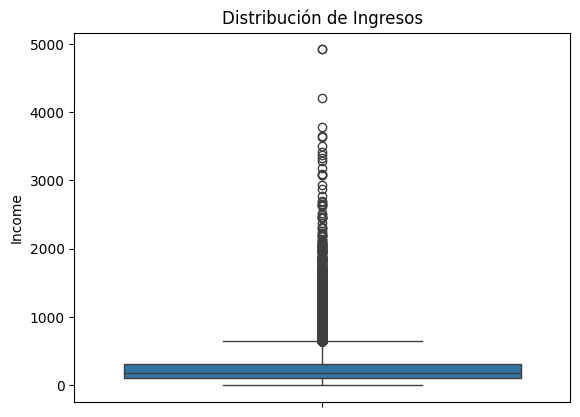

In [ ]:
# Crear un boxplot univariante para la variable 'income'
sns.boxplot(y='duration', data=df)

# Personalizar el gráfico
plt.title('Distribución de Ingresos')
plt.ylabel('Income')
plt.show()

  - Los elementos principales de un boxplot son la caja, la mediana, los bigotes y los outliers.
    - La mediana muestra el valor central de los datos.
    - La caja muestra cómo están distribuidos el 50% central de los datos.
    - Los bigotes muestran la extensión de los datos dentro de un rango razonable.
    - Los outliers son valores inusuales que pueden necesitar más análisis.
  - Un boxplot ayuda a entender la distribución, la dispersión y la presencia de valores atípicos en los datos.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.741698,9.817735,17.000,33.00000,38.0000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.07500,93.7490,93.99400,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.8000,-36.40000,-26.900
euribor3m,43000.0,3.616521,1.538834,0.634,1.46600,4.0760,4.95900,5.045
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


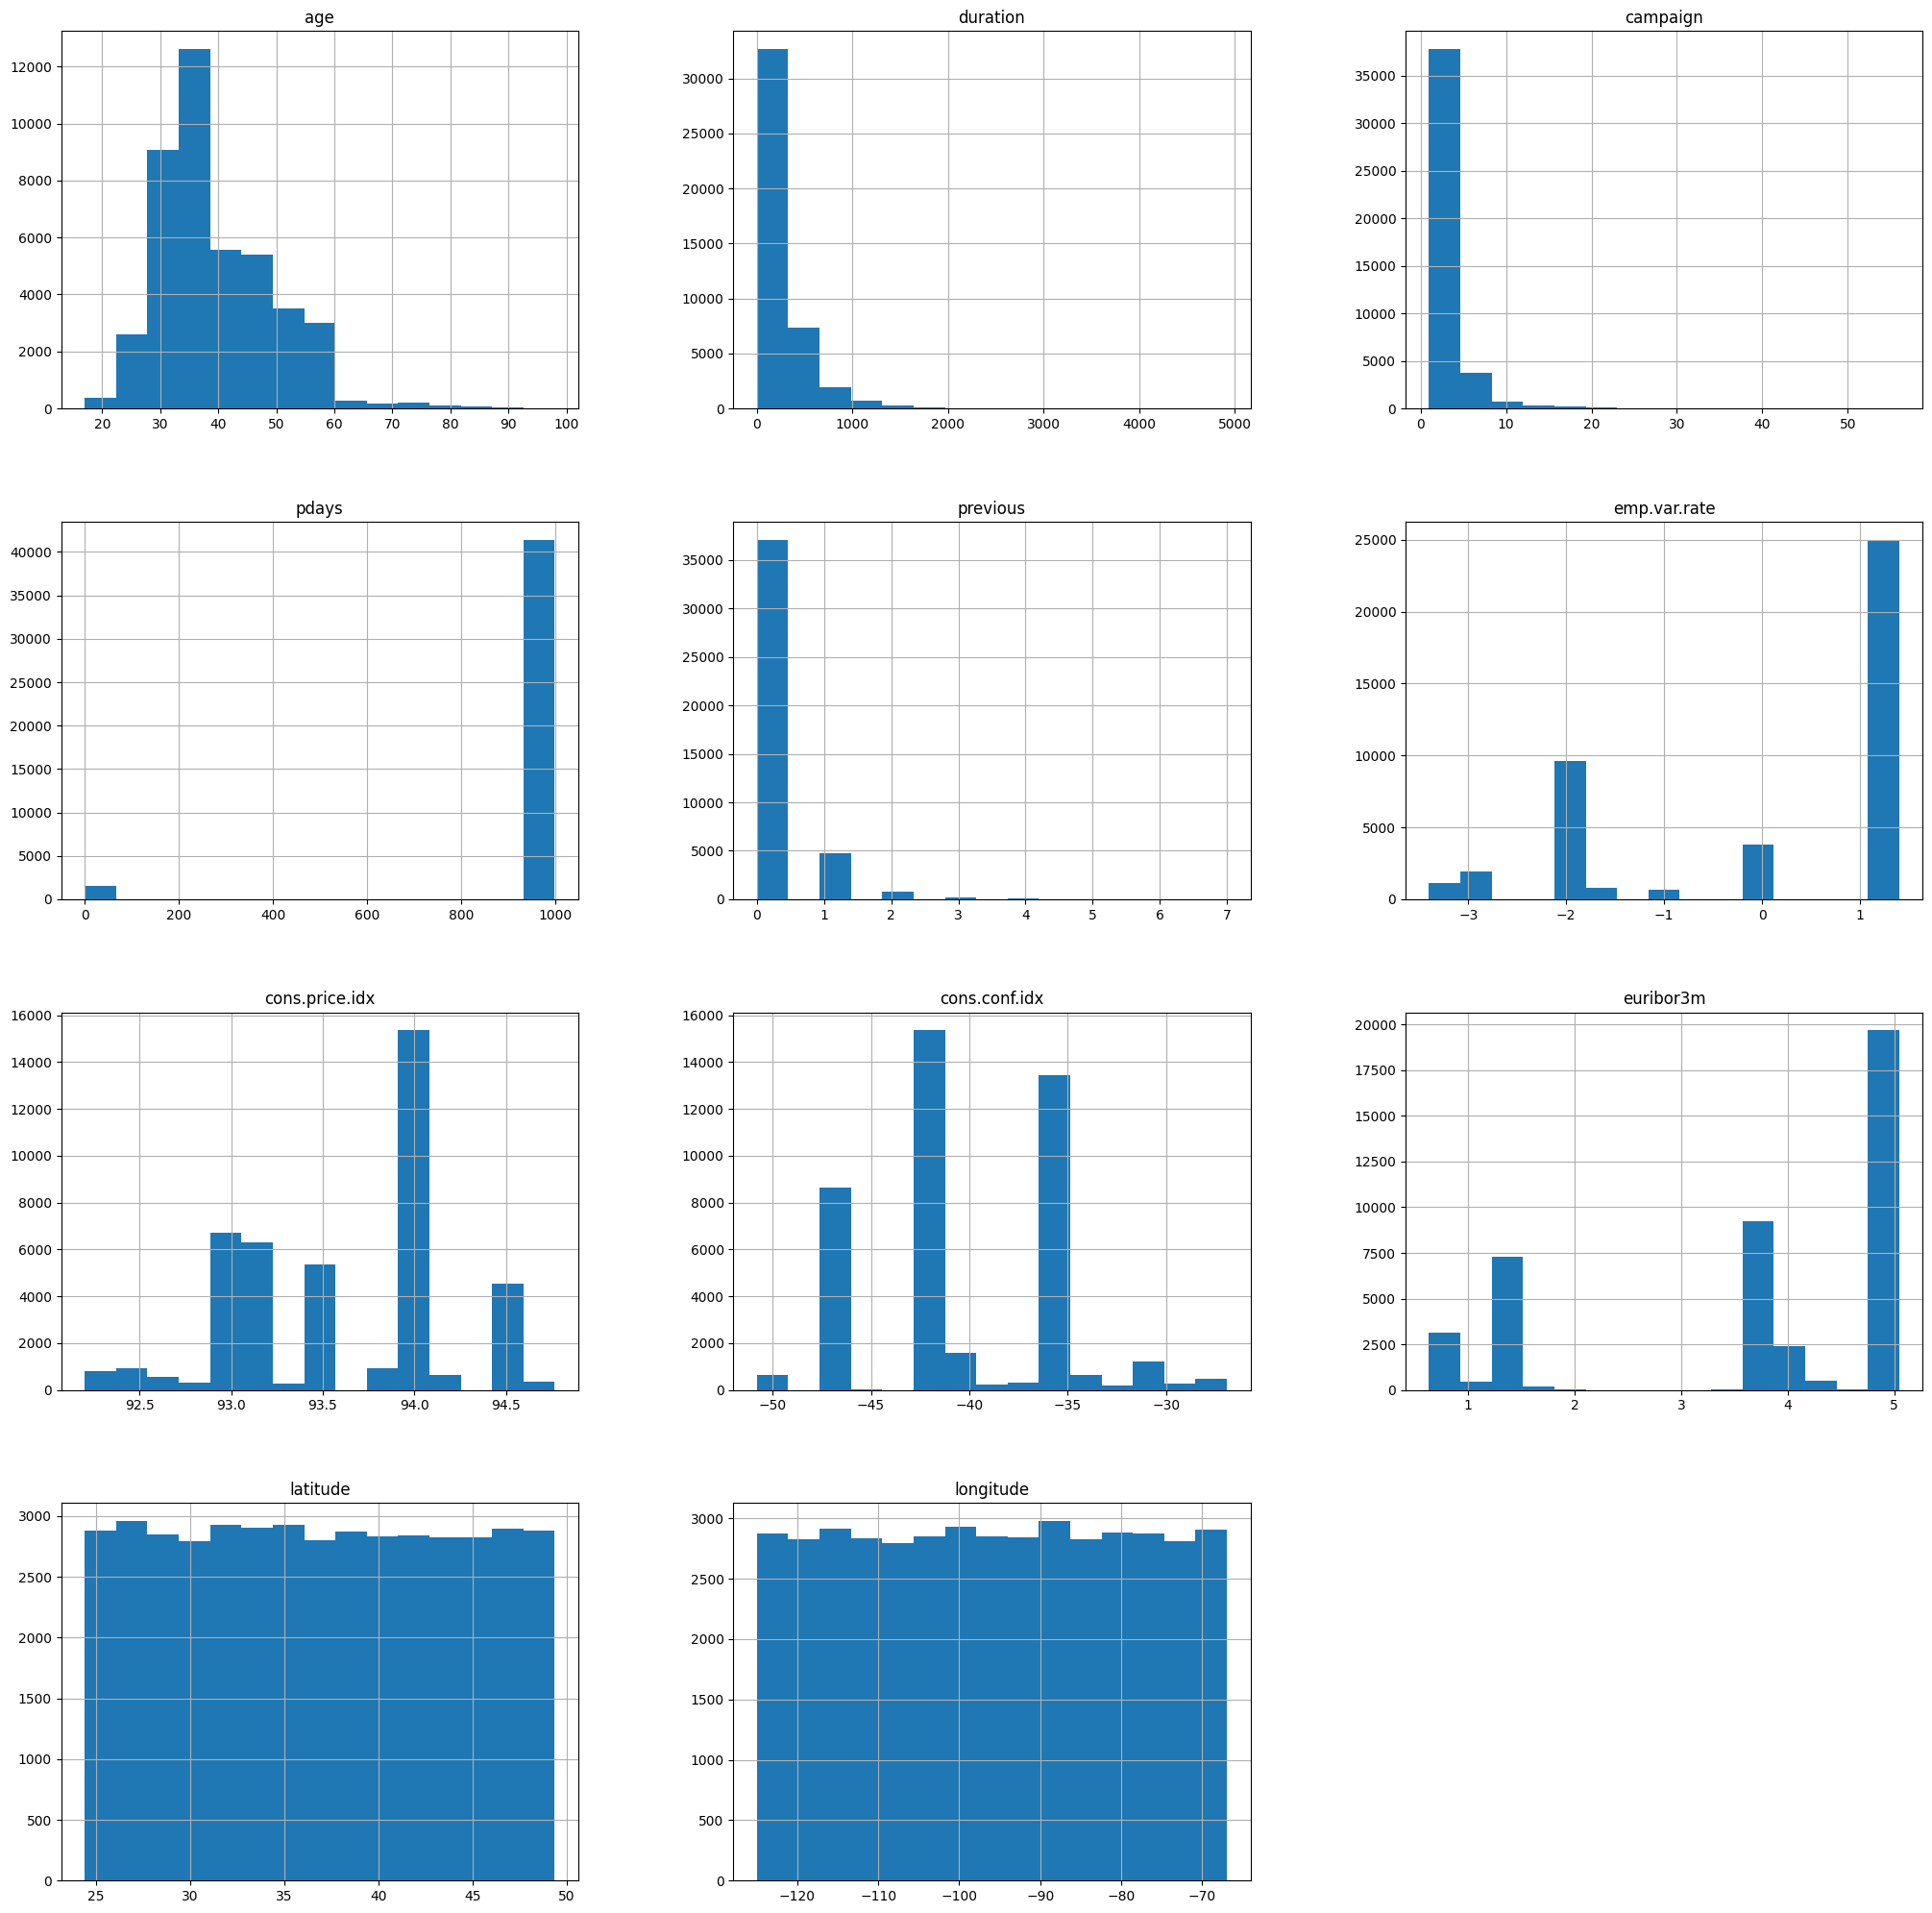

In [ ]:
# Histogramas de todas las variables numéricas del df
num_bins = 15 # número de divisiones en las que se agrupan los datos para su visualización
df.hist(bins=num_bins, figsize=(25,25))
plt.savefig("histogram_plots")
plt.show()

#### 📌 Análisis Univariable: estadísticas descriptivas ('mean', 'median', 'std'...)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.741698,9.817735,17.000,33.00000,38.0000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.07500,93.7490,93.99400,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.8000,-36.40000,-26.900
euribor3m,43000.0,3.616521,1.538834,0.634,1.46600,4.0760,4.95900,5.045
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


#### 📌 Análisis Bivariable: gráficos de dispersión o scatterplots

In [ ]:
# Scatterplot : exploración dos variables numéricas a la vez. Nos ayuda a identificar patrones, tendencias o correlaciones entre las dos variables.
# Podemos repsonder a las siguientes preguntas:
# - Existe una relación positiva? Lineal? Hay outliers?

# Seaborn
sns.scatterplot(x, y, data, hue, style, size)
# Plotly
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, ...)

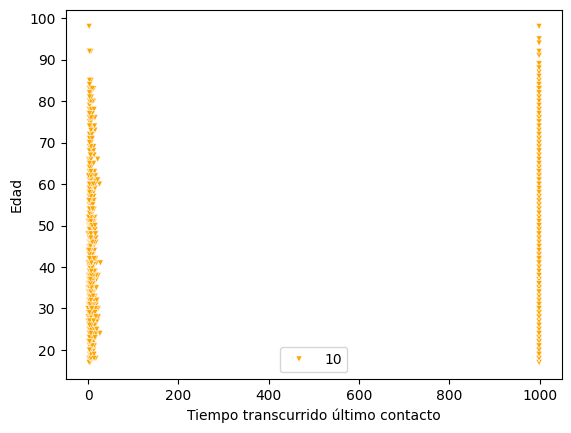

In [ ]:
sns.scatterplot(x = "pdays", 
                y = "age", 
                data = df, 
                size = 10, 
                marker= "v", 
                color = "orange")


# cambiamos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

**¿Cómo podemos interpretar esta gráfica?**

Estas gráficas las usamos para buscar tendencias en los datos, por lo tanto, tendremos que buscar tendencias en las nubes de puntos que tenemos en la gráfica. En este caso concreto no vemos que la nube de punto tienda hacía arriba o hacía abajo, por lo que podríamos decir que no hay ninguna relación entre la edad y el tiempo transcurrido desde el último contacto. Es decir, que independientemente de la edad, no se llama a unos clientes antes que a otros. 

Para hacer esta misma gráfica con matplotlib usaremos el método `plt.scatter()`. Su sintaxis básica es:

```python
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, ...)
```

Los parámetros principales son:

- `x` y `y`: Los valores numéricos que se utilizarán para el eje x e y respectivamente. 

- `data`: El DataFrame o la Serie que contiene los datos.

- `s` (opcional): El tamaño de los puntos en el gráfico de dispersión. Puede ser un valor numérico o una lista/arreglo de valores para especificar tamaños individuales para cada punto.

- `c` (opcional): El color de los puntos en el gráfico de dispersión. 

- `marker` (opcional): El marcador utilizado para representar los puntos en el gráfico. Podremos usar los mismo que en Seaborn

- `cmap` (opcional): El mapa de colores utilizado para mapear los valores de `c` a colores en el gráfico. Puede ser un mapa de colores predefinido o personalizado.

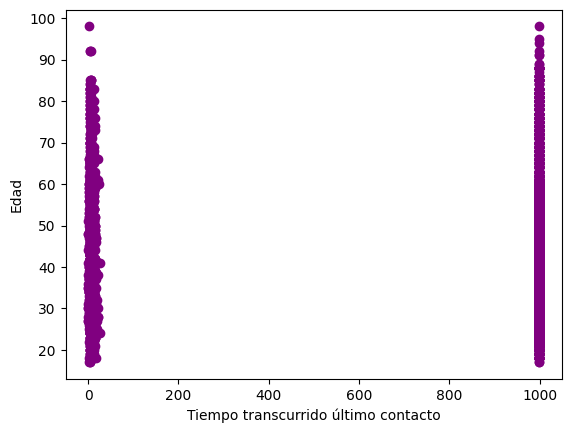

In [ ]:
plt.scatter(x = "pdays", 
            y = "age", 
            data = df, 
            c = "purple" )


plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

#### 📌 Análisis Bivariable: Reg plot

Al igual que el *scatter plot* usaremos este tipo de gráficas cuando queramos explorar la relación entre dos variables numéricas y al mismo tiempo, ver cómo se ajusta una línea de regresión lineal a esos datos. Es útil para identificar la dirección y la fuerza de la relación entre las variables, y para evaluar si existe una correlación lineal entre ellas.

Su sintaxis básica es:


```python
sns.regplot(x, y, data, markers)
```

- `x`: Especifica el nombre de la columna que se colocará en el eje x (horizontal). 

- `y`: Indica el nombre de la columna que se colocará en el eje y (vertical). 

- `data`: Es el DataFrame que contiene tus datos. 

- `markers` (opcional): Permite cambiar los puntos por otro tipo de marcador en la gráfica. Podremos usar los mismos que en el *scatterplot*. 

- `color` (opcional): Nos permite cambiar el color de los puntos de la gráfica. 

In [ ]:
# Regplot : exploración dos variables numéricas a la vez

# Seaborn
sns.regplot(x, y, data, markers)

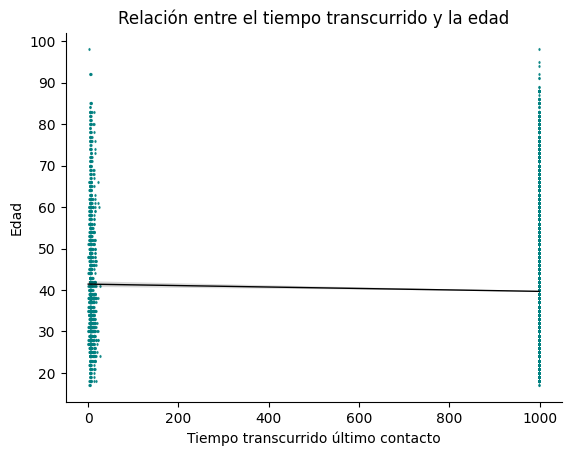

In [ ]:
sns.regplot(x = "pdays", 
            y = "age", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )


plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad")


plt.title("Relación entre el tiempo transcurrido y la edad")


plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

**¿Cómo podemos interpretar esta gráfica?**

Si nos fijamos esta gráfica es bastante parecida a la que sacamos en el *scatterplot*, con la pequeña diferencia de que se ha añadido la línea de tendencia que nos ha ayuda a observar mejor la relación que pueda existir entre las dos variables. En este caso vemos que la línea de tendencia es casi horizontal (lo que indicaría que no existe ninguna relación entre las dos variables estudiadas), sin embargo, parece que esta línea tiende un poco hacía abajo, es decir, que a menor edad mayor es el tiempo transcurrido desde el último contacto. 

#### 📌 Análisis Bivariable: coeficientes de correlación (`.corr()` o `pearsonr`)

In [ ]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

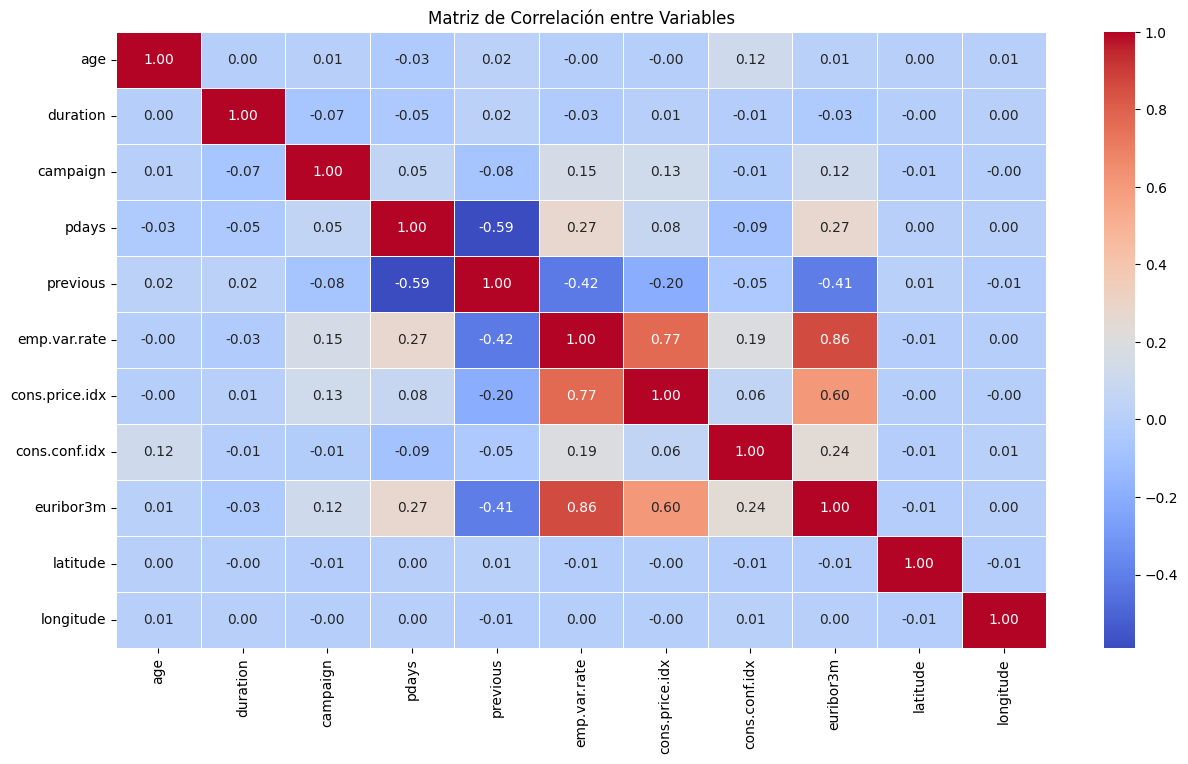

In [ ]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

- La matriz de correlación muestra los coeficientes de correlación entre todas las combinaciones de variables numéricasen un dataset. 
- El coeficiente puede variar entre -1 y 1 y mide la fuerza y dirección de la relación entre dos variables.






### Interpretación del coeficiente

| **Rango del coeficiente** | **Interpretación**                | **Tipo de relación**                |
|---------------------------|-----------------------------------|------------------------------------|
| 1.0                       | Correlación perfecta positiva      | Cuanto más sube una variable, más sube la otra |
| 0.7 a 0.9                 | Correlación positiva fuerte        | Relación positiva clara            |
| 0.4 a 0.6                 | Correlación positiva moderada      | Relación positiva moderada         |
| 0.1 a 0.3                 | Correlación positiva débil         | Relación positiva débil            |
| 0.0                       | Sin correlación                   | No hay relación aparente           |
| -0.1 a -0.3               | Correlación negativa débil         | Relación negativa débil            |
| -0.4 a -0.6               | Correlación negativa moderada      | Relación negativa moderada         |
| -0.7 a -0.9               | Correlación negativa fuerte        | Relación negativa clara            |
| -1.0                      | Correlación perfecta negativa      | Cuanto más sube una variable, más baja la otra |

### Aspectos clave a tener en cuenta:
- La diagonal principal siempre es 1.0 porque representa la correlación de una variable consigo misma.
- Correlación ≠ Causalidad: Una correlación alta no implica que una variable cause cambios en la otra.
- Valores extremos (outliers): Los outliers pueden influir en los coeficientes de correlación.
- Variables categóricas: La correlación no es aplicable para variables categóricas (se utiliza Cramér's V en ese caso).

## Relaciones entre variables categóricas y numéricas -> Resumen de estadísticos

- countplot = Gráfico de conteo (categórico).
- barplot = Gráfico de barras que muestra una estadística resumida (como la media) de una variable numérica para cada categoría.

C:\Users\almud\AppData\Local\Temp\ipykernel_23380\821347161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "marital",
C:\Users\almud\AppData\Local\Temp\ipykernel_23380\821347161.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "marital",
C:\Users\almud\AppData\Local\Temp\ipykernel_23380\821347161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "marital",


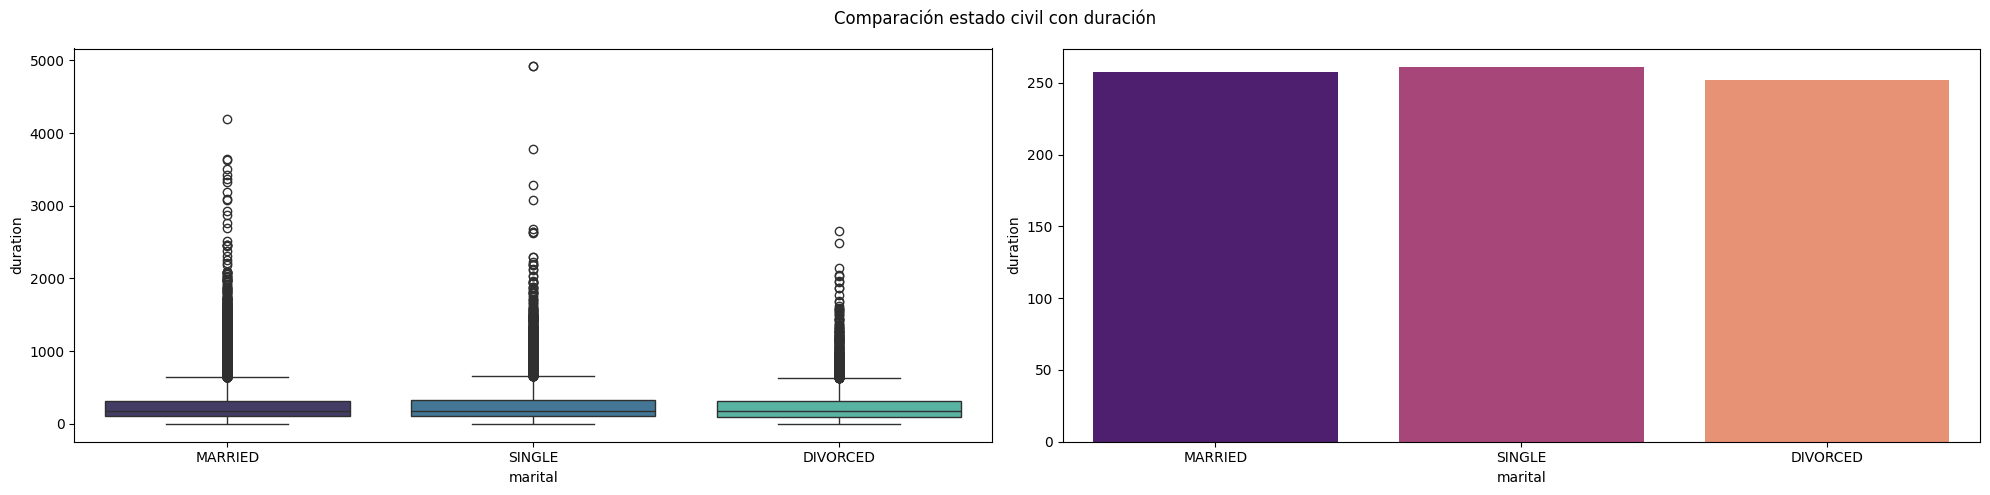

In [ ]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "marital", 
            y = "duration", 
            data = df, 
            ax = axes[0], 
            palette= "mako")


# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "marital", 
            y = "duration", 
            data = df,
            ci = None,
            ax = axes[1], 
            palette = "magma")


# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación estado civil con duración")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

#### Interpretación de las visualizaciones

- Barplot
  - En Seaborn, un barplot muestra barras verticales cuya altura representa una estadística agregada (por defecto, la media) de la variable numérica.

---

### __RESUMEN:__

Visualización


- Variables Categóricas
    - Análisis Univariable:
        - Conteo de frecuencias con gráficos de barras
        - Porcentaje o proporciones
    - Análisis Bivariable:
        - Gráficos de barras
        - Tablas de contingencia
    - Análisis Multivariable:
  
- Variables Numéricas:
    - Análisis Univariable:
        - Histogramas
        - Boxplots
        - Descriptivos
    - Análisis Bivariable:
        - Gráficos de dispersión
        - Regresión
        - Coeficientes correlación
    - Análisis Multivariable:
      

- Relación variables categóricas y numéricas
  - Boxplots
  - Barplots